In [1]:
library(GLMsData)
data(crawl)

In [2]:
str(crawl)

'data.frame':	12 obs. of  5 variables:
 $ BirthMonth: Factor w/ 12 levels "April","August",..: 5 4 8 1 9 7 6 2 12 11 ...
 $ Age       : num  29.8 30.5 29.7 31.8 28.6 ...
 $ SD        : num  7.08 6.96 8.33 6.21 8.07 8.1 6.91 7.61 6.93 7.29 ...
 $ SampleSize: int  32 36 23 26 27 29 21 45 38 44 ...
 $ Temp      : int  66 73 72 63 52 39 33 30 33 37 ...


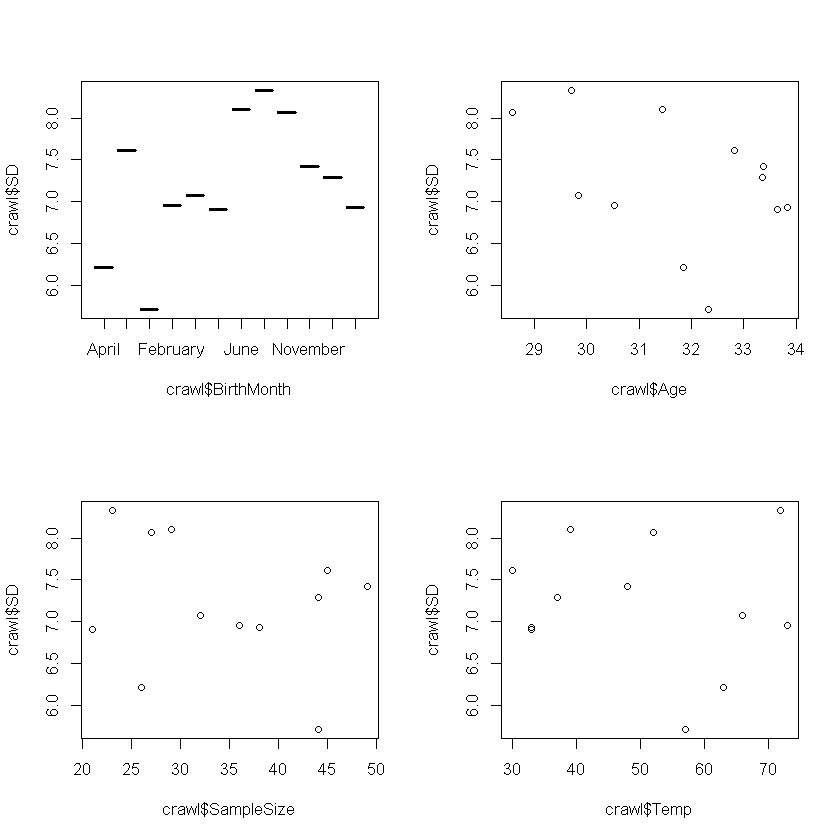

In [7]:
par(mfrow=c(2, 2))
plot(crawl$SD ~ crawl$BirthMonth)
plot(crawl$SD ~ crawl$Age)
plot(crawl$SD ~ crawl$SampleSize)
plot(crawl$SD ~ crawl$Temp)

In [11]:
lm.1 <- lm(SD ~ Age + SampleSize + Temp, data=crawl)

In [12]:
coef(summary(lm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),21.9887608360,5.96559816,3.68592725,0.006166265
Age,-0.4073209073,0.17631914,-2.31013443,0.049678659
SampleSize,0.0005548534,0.02422584,0.02290337,0.982288318
Temp,-0.0367822060,0.01785036,-2.06058646,0.073293200


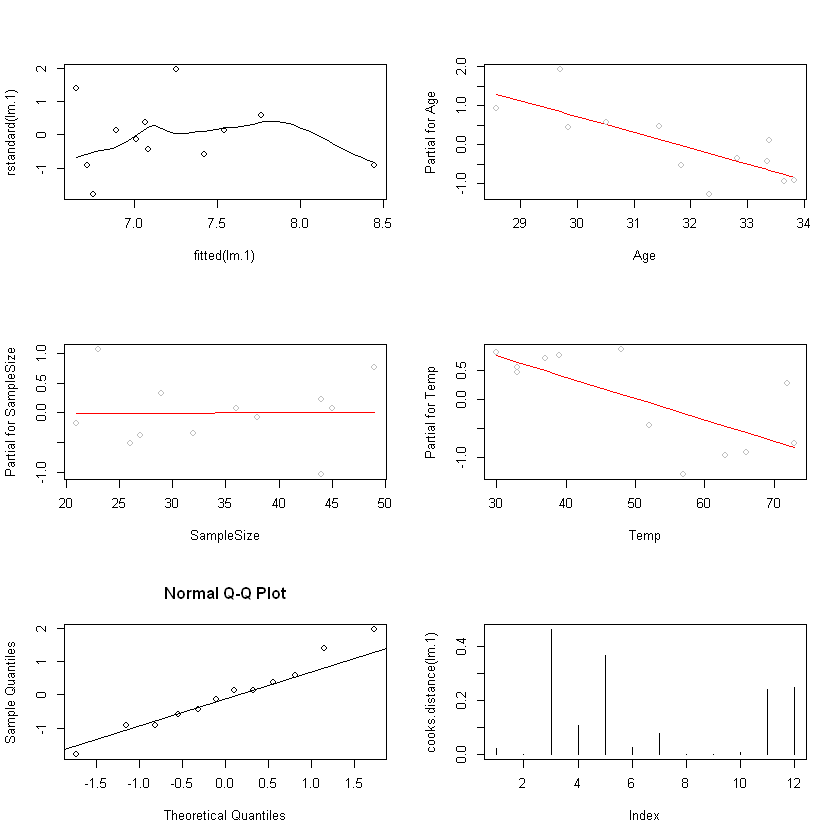

In [13]:
par(mfrow=c(3, 2))

scatter.smooth(rstandard(lm.1) ~ fitted(lm.1))
termplot(lm.1, partial.resid = TRUE, terms="Age")
termplot(lm.1, partial.resid = TRUE, terms="SampleSize")
termplot(lm.1, partial.resid = TRUE, terms="Temp")
qqnorm(rstandard(lm.1))
qqline(rstandard(lm.1))
plot(cooks.distance(lm.1), type="h")

In [14]:
rowSums(influence.measures(lm.1)$is.inf)

1  2  3  4  5  6  7  8  9 10 11 12 
 0  0  0  0  3  0  1  1  0  0  0  0